In [22]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import numpy as np

path = "/work/pi_mzink_umass_edu/SPRITE/skillful_nowcasting/netCDFData/test/20180911/20180911_092617.nc"  # bad
# path = "/work/pi_mzink_umass_edu/SPRITE/skillful_nowcasting/netCDFData/validation/20180910/20180910_000124.nc" # bad

nc_data = Dataset(path, "r")
rr_data = nc_data.variables["RRdata"][:]
trimmed_rr_data = rr_data[:, 8:-8, :]
x_data = nc_data.variables["x0"][:]
y_data = nc_data.variables["y0"][8:-8]

data = trimmed_rr_data[0]

# Define target and original size
target_size = (256, 256)
original_size = (350, 350)

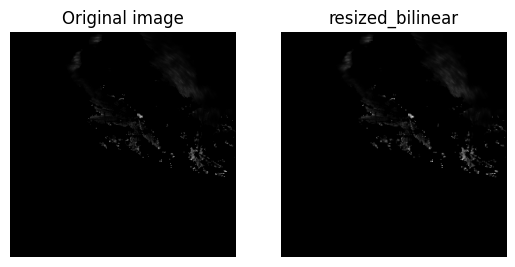

Bilinear PSNR: 51.42264717784008, SSIM: 0.9943834943596118


In [23]:
# Bilinear interpolation
resized_bilinear = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(data, cmap="gray")
ax[0].title.set_text("Original image")
ax[0].axis("off")

ax[1].imshow(resized_bilinear, cmap="gray")
ax[1].title.set_text("resized_bilinear")
ax[1].axis("off")

plt.show()

resized_bilinear_back = cv2.resize(resized_bilinear, dsize=original_size, interpolation=cv2.INTER_LINEAR)
psnr_bilinear = psnr(data, resized_bilinear_back, data_range=255)
ssim_bilinear = ssim(data, resized_bilinear_back, data_range=255)
print(f"Bilinear PSNR: {psnr_bilinear}, SSIM: {ssim_bilinear}")

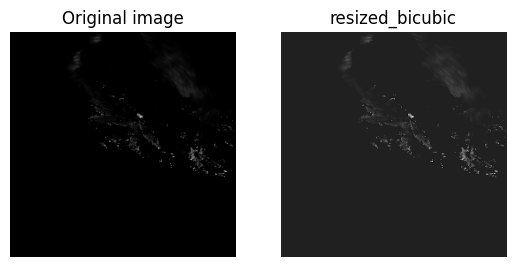

Bicubic PSNR: 52.32400265272134, SSIM: 0.9957586239581134


In [24]:
# Bicubic interpolation
resized_bicubic = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(data, cmap="gray")
ax[0].title.set_text("Original image")
ax[0].axis("off")

ax[1].imshow(resized_bicubic, cmap="gray")
ax[1].title.set_text("resized_bicubic")
ax[1].axis("off")

plt.show()

resized_bicubic_back = cv2.resize(resized_bicubic, dsize=original_size, interpolation=cv2.INTER_CUBIC)
psnr_bicubic = psnr(data, resized_bicubic_back, data_range=255)
ssim_bicubic = ssim(data, resized_bicubic_back, data_range=255)
print(f"Bicubic PSNR: {psnr_bicubic}, SSIM: {ssim_bicubic}")

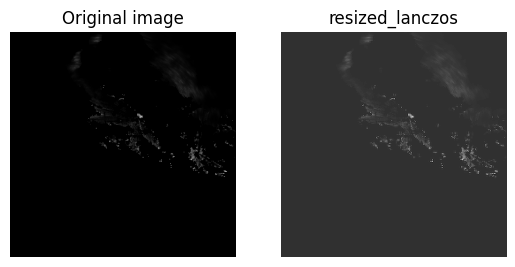

Lanczos PSNR: 51.914502496622475, SSIM: 0.9954045511068944


In [25]:
# Lanczos interpolation
resized_lanczos = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(data, cmap="gray")
ax[0].title.set_text("Original image")
ax[0].axis("off")

ax[1].imshow(resized_lanczos, cmap="gray")
ax[1].title.set_text("resized_lanczos")
ax[1].axis("off")

plt.show()

resized_lanczos_back = cv2.resize(resized_lanczos, dsize=original_size, interpolation=cv2.INTER_LANCZOS4)

psnr_lanczos = psnr(data, resized_lanczos_back, data_range=255)
ssim_lanczos = ssim(data, resized_lanczos_back, data_range=255)
print(f"Lanczos PSNR: {psnr_lanczos}, SSIM: {ssim_lanczos}")

In [26]:
import time

running_time = 100000

start_time = time.time()

for i in range(running_time):
    resized_bilinear = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_LINEAR)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Linear for {running_time} times took {elapsed_time} seconds to execute.")


start_time = time.time()

for i in range(running_time):
    resized_bicubic = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_CUBIC)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Bicubic for {running_time} times took {elapsed_time} seconds to execute.")


start_time = time.time()

for i in range(running_time):
    resized_lanczos = cv2.resize(data, dsize=target_size, interpolation=cv2.INTER_LANCZOS4)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Lanczos for {running_time} times took {elapsed_time} seconds to execute.")

Linear for 100000 times took 3.8666200637817383 seconds to execute.
Bicubic for 100000 times took 7.72891640663147 seconds to execute.
Lanczos for 100000 times took 35.944276571273804 seconds to execute.
